# Fremont Bridge Bike Traffic Analysis

### William Gray

First, save data location URL so we can access anytime

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
import urllib

In [3]:
urllib.urlretrieve(URL, 'fremont.csv')

('fremont.csv', <httplib.HTTPMessage instance at 0x11153a368>)

In [4]:
!head fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


## import data, index by date
parse_dates will load dates in date format instead of as strings

In [5]:
import pandas as pd
df = pd.read_csv('fremont.csv', index_col='Date', parse_dates=True)
df.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


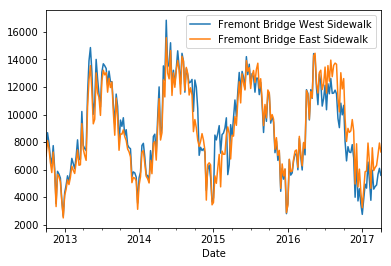

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df.resample('W').sum().plot()

Seaborn style to add grey background and gridlines, and make columns less verbose

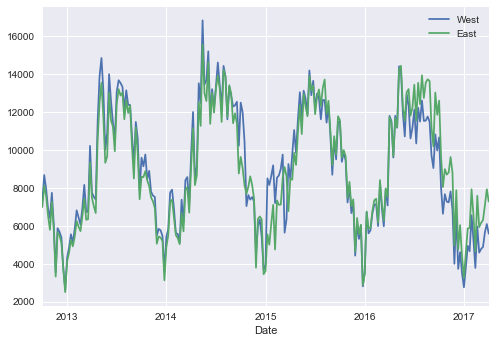

In [7]:
plt.style.use('seaborn')
df.columns = ['West', 'East']
df.resample('W').sum().plot()

### Add total section, look at more plots and analysis

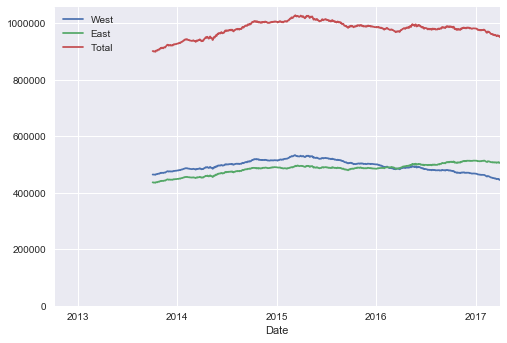

In [8]:
df['Total'] = df['West'] + df['East']

ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None); # sets y axis to 0 at bottom, and automatic at top

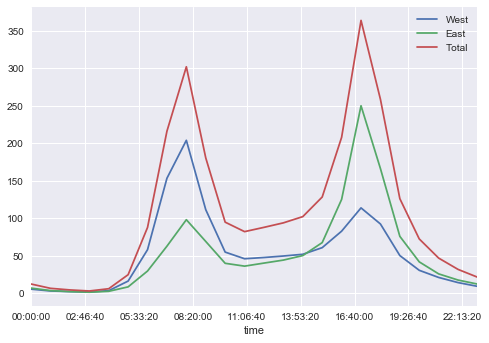

In [9]:
df.groupby(df.index.time).mean().plot()

In [10]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


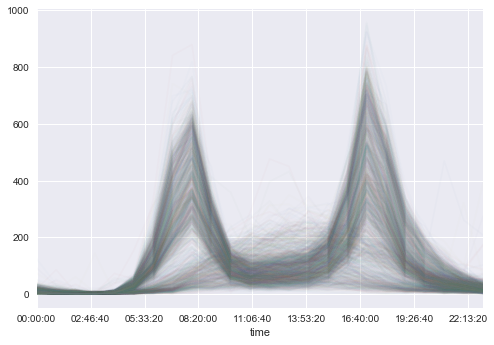

In [11]:
pivoted.plot(legend=False, alpha=0.02);